# Analyze ups and downs in the market and predict future stock price returns based on Indian Market data from 2000 to 2020.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('ADANIPORTS.csv')

# Display the first few rows of the dataset.
df.head() 

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


# Data Preprocessing

In [3]:
df.shape

(3322, 15)

In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [5]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [7]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [8]:
df["Symbol"].unique()

array(['MUNDRAPORT', 'ADANIPORTS'], dtype=object)

In [9]:
df.duplicated().sum()

0

In [10]:
# Checking for unique values in the 'Date' column
unique_dates = df['Date'].unique()

# Printing the number of unique dates and the unique dates themselves
print(f"Number of unique dates: {len(unique_dates)}")
print("Unique dates:", unique_dates)

Number of unique dates: 3322
Unique dates: ['2007-11-27' '2007-11-28' '2007-11-29' ... '2021-04-28' '2021-04-29'
 '2021-04-30']


In [11]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [12]:
df['Trades'].fillna(0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17356\1167206167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trades'].fillna(0, inplace=True)


In [13]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [14]:
# # Calculate the 50-day and 100-day moving averages of the 'Close' price.
# df['MA_50'] = df['Close'].rolling(window=50).mean()
# df['MA_100'] = df['Close'].rolling(window=100).mean()
# df.head()

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume             int64
%Deliverble                  float64
dtype: object

In [16]:
df['Price_Change'] = df['Close'].pct_change()  # Percentage change in stock price
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price_Change
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,0.0,9859619,0.3612,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,0.0,1453278,0.3172,-0.071659
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,0.0,1069678,0.2088,-0.010851
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,0.0,1260913,0.2735,0.042242
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,0.0,816123,0.2741,0.051815


In [17]:
df['Price_Change'] = df['Price_Change'].fillna(0)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price_Change
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,0.0,9859619,0.3612,0.000000
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,0.0,1453278,0.3172,-0.071659
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,0.0,1069678,0.2088,-0.010851
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,0.0,1260913,0.2735,0.042242
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,0.0,816123,0.2741,0.051815


In [18]:
#Normalization 
scaler = MinMaxScaler()
df1=df[['Volume', 'Turnover', 'Close']] = scaler.fit_transform(df[['Volume', 'Turnover', 'Close']])
df1

array([[0.27922682, 0.32931759, 0.71274334],
       [0.04676268, 0.05281808, 0.65521697],
       [0.05231798, 0.05573317, 0.64712993],
       ...,
       [0.11406328, 0.10264612, 0.53211889],
       [0.14164548, 0.12779432, 0.53253575],
       [0.12884194, 0.11475047, 0.5186127 ]])

In [19]:
#extracted features
#Month can capture seasonal effects or recurring monthly patterns.
#Year' can reflect long-term trends or changes over time.
#Day' can indicate specific events or changes that happen on certain days.

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [20]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Price_Change,Year,Month,Day
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,0.712743,984.72,0.279227,0.329318,0.0,9859619,0.3612,0.000000,2007,11,27
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,0.655217,941.38,0.046763,0.052818,0.0,1453278,0.3172,-0.071659,2007,11,28
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,0.647130,888.09,0.052318,0.055733,0.0,1069678,0.2088,-0.010851,2007,11,29
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,0.678269,929.17,0.047054,0.052456,0.0,1260913,0.2735,0.042242,2007,11,30
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,0.718079,965.65,0.030347,0.035202,0.0,816123,0.2741,0.051815,2007,12,3


In [21]:
# Displaying the first few rows of the preprocessed DataFrame
df[['Date', 'Close', 'Price_Change', 'Volume', 'Turnover']].head()

,Date,Close,Price_Change,Volume,Turnover
0,2007-11-27,0.712743,0.000000,0.279227,0.329318
1,2007-11-28,0.655217,-0.071659,0.046763,0.052818
2,2007-11-29,0.647130,-0.010851,0.052318,0.055733
3,2007-11-30,0.678269,0.042242,0.047054,0.052456
4,2007-12-03,0.718079,0.051815,0.030347,0.035202


#  Data Visualization

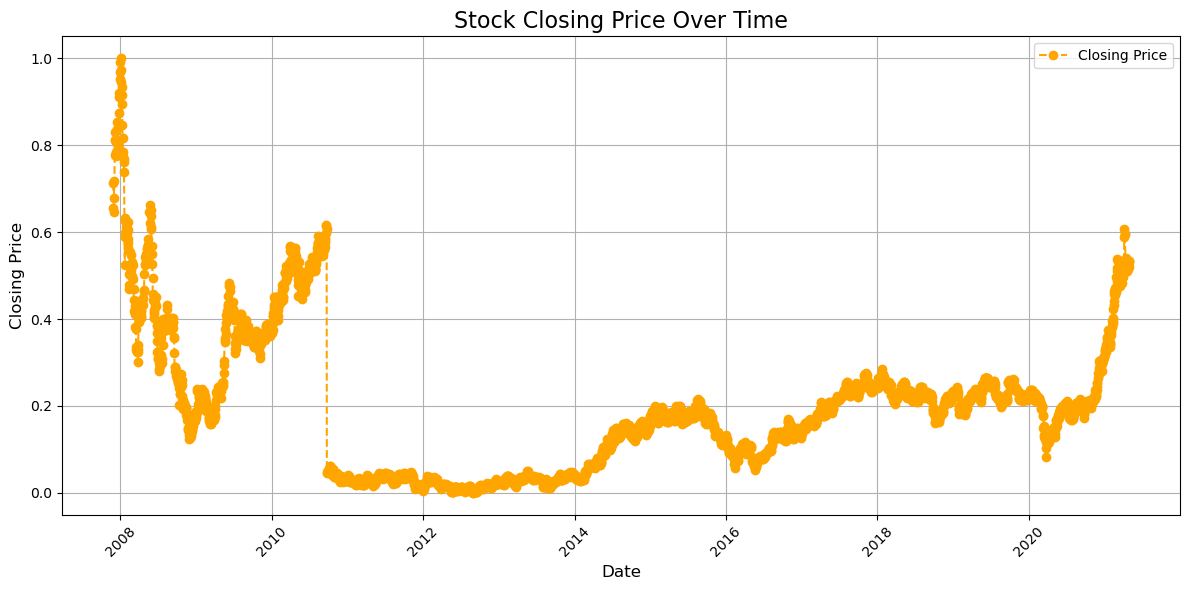

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', linestyle='--', marker='o', color='orange')
plt.title('Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()  # Add a grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

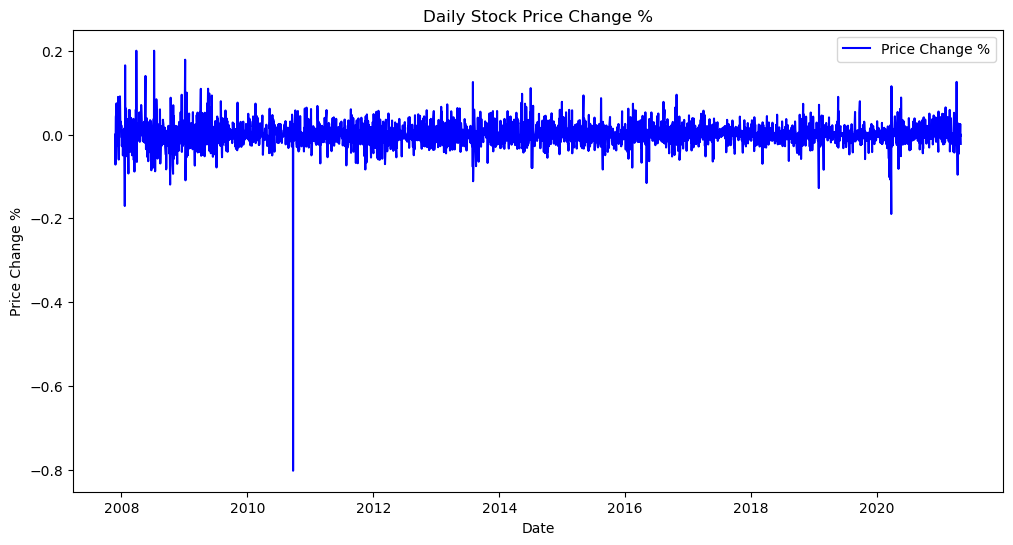

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change %', color='blue')
plt.title('Daily Stock Price Change %')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

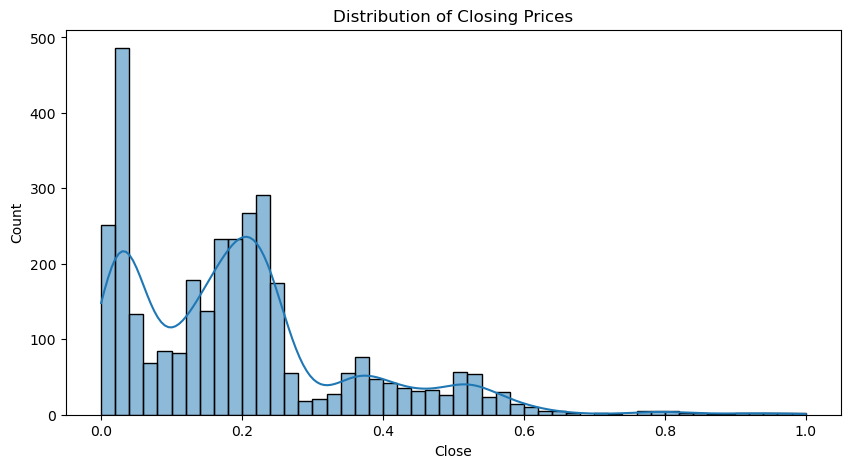

In [24]:
# Distribution of closing prices
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


In [40]:
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                       float64
Turnover                     float64
Trades                       float64
Deliverable Volume             int64
%Deliverble                  float64
Price_Change                 float64
Year                           int32
Month                          int32
Day                            int32
dtype: object

<Axes: >

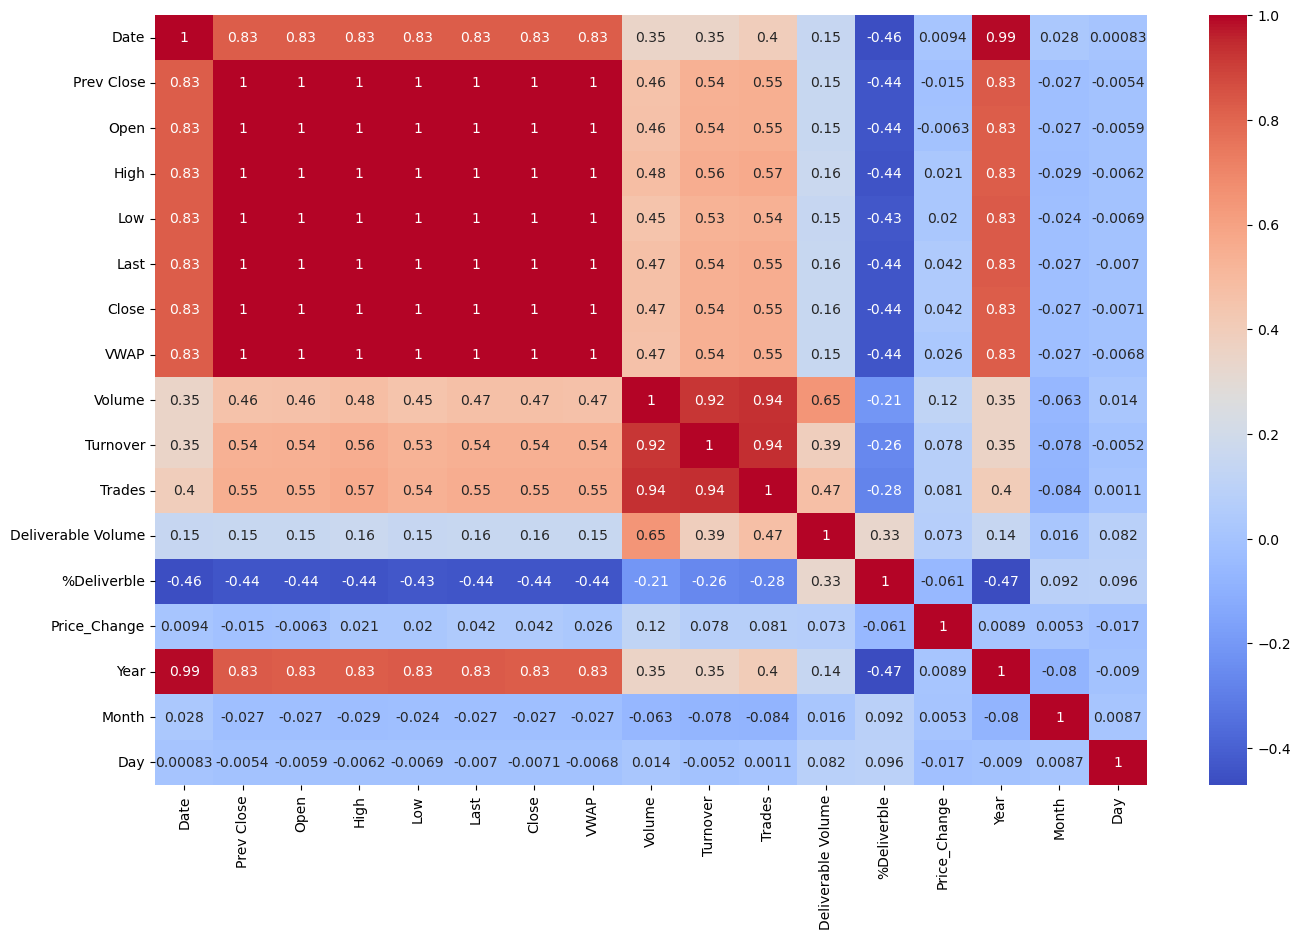

In [26]:
# Selecting individual Stocks to carry forward the analysis
data_ap = df.loc[ df["Symbol"] == "ADANIPORTS"]

# Dropping Columns since they are not important
data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)

# correlation matrix for Asianpaints
corr = data_ap.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

 # Splitting Data for Training and Testing
 

In [27]:
X = df[['Year', 'Month', 'Day', 'Volume']]  # Features
y = df['Close']  # Target variable

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Linear Regression Model

In [30]:
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Accuracy based on R^2 (higher R^2 means better accuracy)
print(f'Model Accuracy (R^2 Score): {r2 * 100:.2f}%')


Mean Squared Error (MSE): 0.025640149045363266
Root Mean Squared Error (RMSE): 0.1601254166126142
R^2 Score: 0.06088247266526192
Model Accuracy (R^2 Score): 6.09%


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')
print(f'Random Forest - Model Accuracy (R^2 Score): {r2_rf * 100:.2f}%')


Random Forest - Mean Squared Error (MSE): 0.0001506776633332585
Random Forest - Root Mean Squared Error (RMSE): 0.012275083027550506
Random Forest - R^2 Score: 0.9944811539759869
Random Forest - Model Accuracy (R^2 Score): 99.45%


In [33]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')  # You can tune kernel, C, and gamma
svr_model.fit(X_train_scaled, y_train)

# Predict the target values
y_pred_svr = svr_model.predict(X_test_scaled)

# Define a simple accuracy metric (percentage of predictions within a threshold)
threshold = 0.1  # Example threshold of 10% relative error
accuracy = np.mean(np.abs((y_test - y_pred_svr) / y_test) < threshold) * 100

# Print the simple accuracy
print(f'SVR - Simple Accuracy (within {threshold * 100}% error): {accuracy:.2f}%')

# You can also print MSE and RMSE for reference
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f'SVR - Mean Squared Error (MSE): {mse_svr}')
print(f'SVR - Root Mean Squared Error (RMSE): {rmse_svr}')


SVR - Simple Accuracy (within 10.0% error): 19.25%
SVR - Mean Squared Error (MSE): 0.010465071539902799
SVR - Root Mean Squared Error (RMSE): 0.10229893225201717


In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_scaled, y_train)

# Predict the target values
y_pred_knn = knn_model.predict(X_test_scaled)

# Define a simple accuracy metric (percentage of predictions within a threshold)
threshold = 0.5  # Example threshold of 10% relative error
accuracy = np.mean(np.abs((y_test - y_pred_knn) / y_test) < threshold) * 100

# Print the simple accuracy
print(f'KNN - Simple Accuracy (within {threshold * 100}% error): {accuracy:.2f}%')



KNN - Simple Accuracy (within 50.0% error): 79.25%


# Predicting future stock price

In [35]:
future_data = pd.DataFrame([[2021, 5, 15, 2000000]], columns=['Year', 'Month', 'Day', 'Volume'])


In [36]:
future_data_scaled = scaler.transform(future_data)


In [37]:
future_pred = linear_model.predict(future_data_scaled)
print(f'Predicted Stock Price for 2021-05-15: {future_pred[0]}')

Predicted Stock Price for 2021-05-15: 1324117.895860173


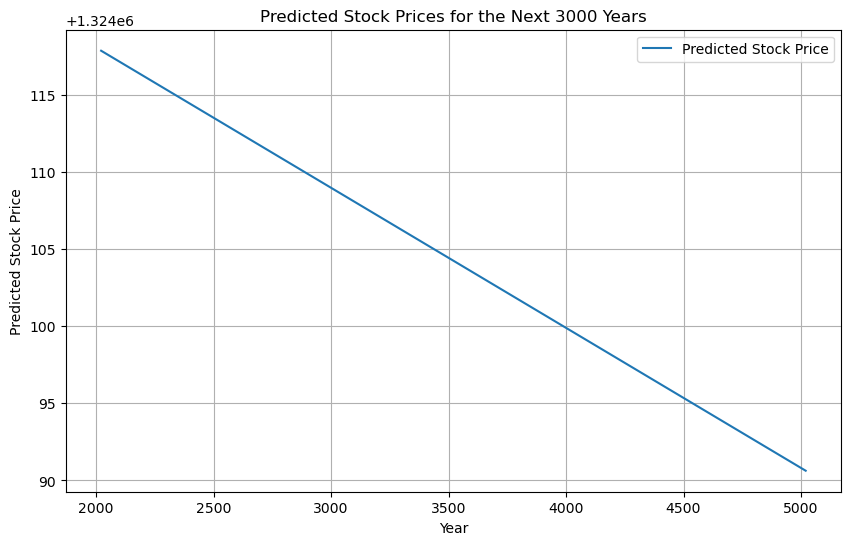

In [38]:


future_years = np.arange(2021, 2021 + 3000)  # from 2021 to 5021

# We'll assume the same month, day, and volume for simplicity 
future_month = 5
future_day = 15
future_volume = 2000000  # Estimated constant volume

# Create a DataFrame for future predictions
future_data = pd.DataFrame({
    'Year': future_years,
    'Month': [future_month] * len(future_years),
    'Day': [future_day] * len(future_years),
    'Volume': [future_volume] * len(future_years)
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Predict future stock prices
future_pred = linear_model.predict(future_data_scaled)

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_years, future_pred, label='Predicted Stock Price')
plt.title('Predicted Stock Prices for the Next 3000 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


In [39]:
# Display predicted stock prices for each year
for year, pred in zip(future_years, future_pred):
    print(f'Year: {year}, Predicted Stock Price: {pred:.2f}')



Year: 2021, Predicted Stock Price: 1324117.90
Year: 2022, Predicted Stock Price: 1324117.89
Year: 2023, Predicted Stock Price: 1324117.88
Year: 2024, Predicted Stock Price: 1324117.87
Year: 2025, Predicted Stock Price: 1324117.86
Year: 2026, Predicted Stock Price: 1324117.85
Year: 2027, Predicted Stock Price: 1324117.84
Year: 2028, Predicted Stock Price: 1324117.83
Year: 2029, Predicted Stock Price: 1324117.82
Year: 2030, Predicted Stock Price: 1324117.81
Year: 2031, Predicted Stock Price: 1324117.80
Year: 2032, Predicted Stock Price: 1324117.80
Year: 2033, Predicted Stock Price: 1324117.79
Year: 2034, Predicted Stock Price: 1324117.78
Year: 2035, Predicted Stock Price: 1324117.77
Year: 2036, Predicted Stock Price: 1324117.76
Year: 2037, Predicted Stock Price: 1324117.75
Year: 2038, Predicted Stock Price: 1324117.74
Year: 2039, Predicted Stock Price: 1324117.73
Year: 2040, Predicted Stock Price: 1324117.72
Year: 2041, Predicted Stock Price: 1324117.71
Year: 2042, Predicted Stock Price: